 Import Libraries and Define Auxiliary Functions


In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe


In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


*   create a column for the class


In [8]:
Y = data['Class'].to_numpy()
Y = pd.Series(Y)


In [9]:
# Create a StandardScaler object
transform = preprocessing.StandardScaler()

# Fit the scaler to the data and transform it
X = transform.fit_transform(X)


*   Split into training data and test data


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2)


In [12]:
Y_test.shape

(18,)

Create a logistic regression object  then create a  GridSearchCV object  logreg_cv with cv = 10.  Fit the object to find the best parameters from the dictionary parameters .


In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:

lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)

logreg_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8266666666666665


In [16]:
# Calculate accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)

# Print the test accuracy
print("Accuracy on test data:", test_accuracy)


Accuracy on test data: 0.8333333333333334


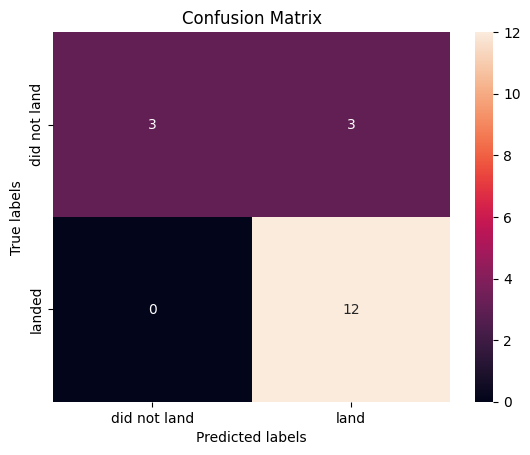

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)



Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.



In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
# Create a GridSearchCV object for SVM
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the data
svm_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [20]:

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8066666666666666


In [21]:
# Calculate accuracy on the test data for SVM
test_accuracy_svm = svm_cv.score(X_test, Y_test)


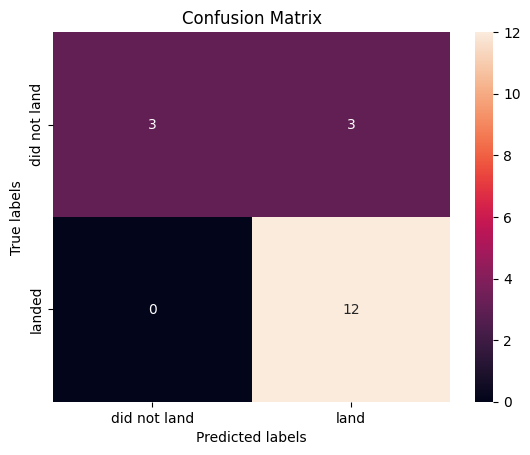

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [24]:
# Create a GridSearchCV object for the decision tree
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the data
tree_cv.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [25]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8633333333333335


In [26]:
# Calculate accuracy on the test data
test_accuracy_tree = tree_cv.score(X_test, Y_test)

# Print the test accuracy
print("Accuracy on test data (Decision Tree):", test_accuracy_tree)


Accuracy on test data (Decision Tree): 0.7222222222222222


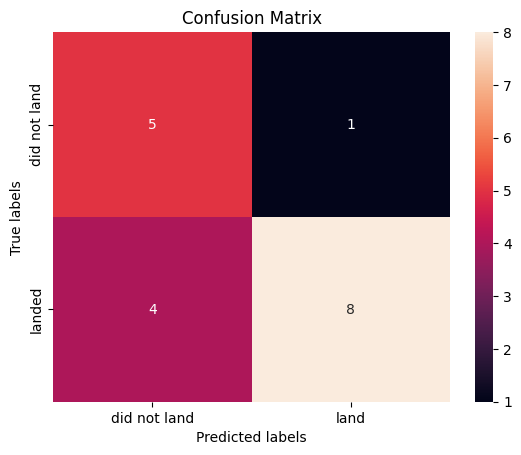

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}



In [29]:
# Create a GridSearchCV object for KNN
knn = KNeighborsClassifier()


knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit the GridSearchCV object to the data
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2}
accuracy : 0.8233333333333335


In [31]:
# Calculate accuracy on the test data
test_accuracy_knn = knn_cv.score(X_test, Y_test)

# Print the test accuracy
print("Accuracy on test data (KNN):", test_accuracy_knn)


Accuracy on test data (KNN): 0.7777777777777778


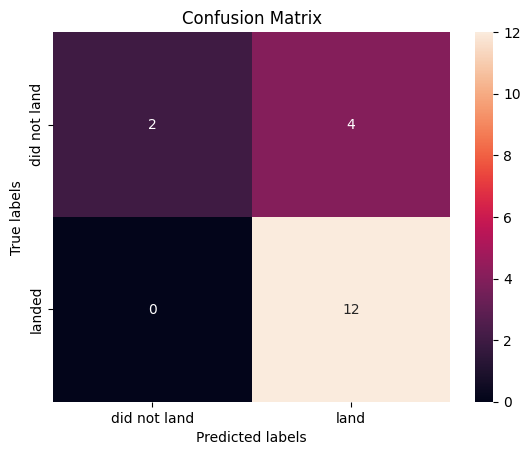

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Find the method performs best:


In [33]:
# Print the test accuracies for all models
print("Accuracy on test data (Logistic Regression):", test_accuracy)
print("Accuracy on test data (Decision Tree):", test_accuracy_tree)
print("Accuracy on test data (KNN):", test_accuracy_knn)
print("Accuracy on test data (SVM):", test_accuracy_svm)

# Find the model with the highest accuracy
best_model = max(
    [("Logistic Regression", test_accuracy),
     ("Decision Tree", test_accuracy_tree),
     ("KNN", test_accuracy_knn),
     ("SVM", test_accuracy_svm)],
    key=lambda item: item[1]  # Compare based on accuracy (item[1])
)

# Print the best model and its accuracy
print("\nBest performing model:", best_model[0])
print("Accuracy:", best_model[1])


Accuracy on test data (Logistic Regression): 0.8333333333333334
Accuracy on test data (Decision Tree): 0.7222222222222222
Accuracy on test data (KNN): 0.7777777777777778
Accuracy on test data (SVM): 0.8333333333333334

Best performing model: Logistic Regression
Accuracy: 0.8333333333333334


In [34]:
data.to_csv('my_dataframe.csv', index=False)



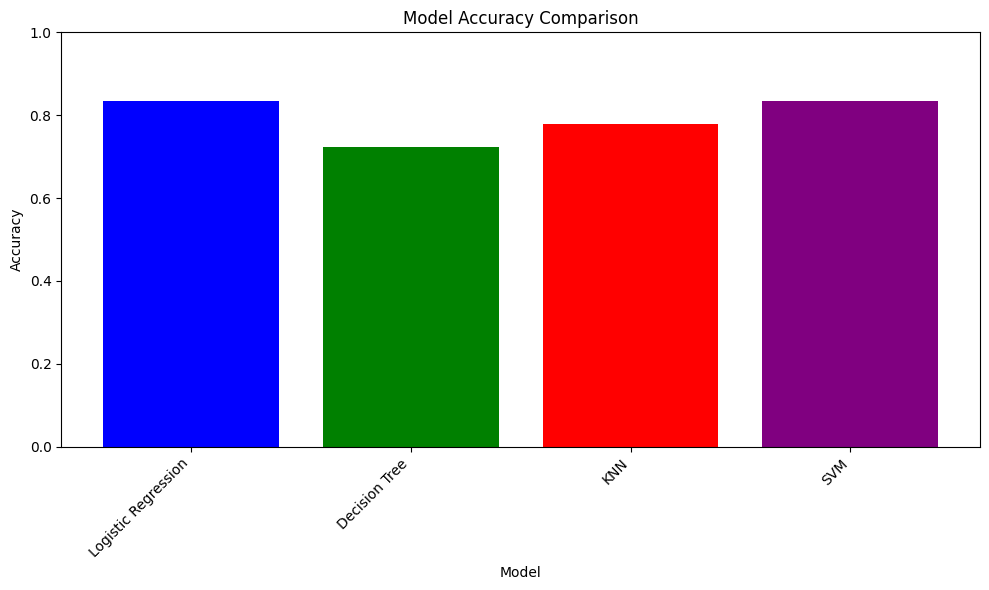

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for each model
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM']
accuracies = [test_accuracy, test_accuracy_tree, test_accuracy_knn, test_accuracy_svm]

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Logistic Regression ---
yhat_lr = logreg_cv.predict(X_test)
precision_lr = precision_score(Y_test, yhat_lr)
recall_lr = recall_score(Y_test, yhat_lr)
f1_lr = f1_score(Y_test, yhat_lr)

# --- Decision Tree ---
yhat_tree = tree_cv.predict(X_test)
precision_tree = precision_score(Y_test, yhat_tree)
recall_tree = recall_score(Y_test, yhat_tree)
f1_tree = f1_score(Y_test, yhat_tree)

# --- KNN ---
yhat_knn = knn_cv.predict(X_test)
precision_knn = precision_score(Y_test, yhat_knn)
recall_knn = recall_score(Y_test, yhat_knn)
f1_knn = f1_score(Y_test, yhat_knn)
# --- SVM ---
yhat_svm = svm_cv.predict(X_test)
precision_svm = precision_score(Y_test, yhat_svm)
recall_svm = recall_score(Y_test, yhat_svm)
f1_svm = f1_score(Y_test, yhat_svm)

# Print the results
print("Logistic Regression:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("\nDecision Tree:")
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-score:", f1_tree)
print("\nKNN:")
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
print("\nSVM:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)



Logistic Regression:
Precision: 0.8
Recall: 1.0
F1-score: 0.8888888888888888

Decision Tree:
Precision: 0.8888888888888888
Recall: 0.6666666666666666
F1-score: 0.7619047619047619

KNN:
Precision: 0.75
Recall: 1.0
F1-score: 0.8571428571428571

SVM:
Precision: 0.8
Recall: 1.0
F1-score: 0.8888888888888888
